In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import jdatetime

In [2]:
df_train = pd.read_csv("data/train_data.csv")
df_train.head()

,Invoice,Description,Quantity,UnitPrice,Customer ID,Country,StockCode,InvoiceDate
0,21387,TRAVEL CARD WALLET VINTAGE ROSE,24,0.42,1488,United Kingdom,2178,1401-11-27 14:46:24
1,8857,FAWN AND MUSHROOM GREETING CARD,12,0.42,6420,United Kingdom,3449,1401-03-30 13:56:24
2,7936,MONEY BOX POCKET MONEY DESIGN,1,1.25,10992,United Kingdom,1599,1401-03-12 14:10:24
3,4659,JUMBO BAG OWLS,10,1.95,4670,United Kingdom,240,1401-01-03 09:38:24
4,35812,SPACEBOY LUNCH BOX,2,1.95,11600,United Kingdom,1813,1402-09-06 09:12:24


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488604 entries, 0 to 488603
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      488604 non-null  object 
 1   Description  488604 non-null  object 
 2   Quantity     488604 non-null  int64  
 3   UnitPrice    488604 non-null  float64
 4   Customer ID  488604 non-null  int64  
 5   Country      488604 non-null  object 
 6   StockCode    488604 non-null  int64  
 7   InvoiceDate  488604 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 29.8+ MB


In [4]:
df_train.describe()

,Quantity,UnitPrice,Customer ID,StockCode
count,488604.000000,488604.000000,488604.000000,488604.000000
mean,12.040464,3.363751,6071.101162,1864.081293
std,160.873074,33.255031,3340.872086,1103.457217
min,-74215.000000,0.000000,2.000000,0.000000
25%,2.000000,1.250000,3398.000000,1098.000000
50%,5.000000,1.950000,5932.000000,1663.000000
75%,12.000000,3.750000,8944.000000,2441.000000
max,74215.000000,8985.600000,11884.000000,4645.000000


In [5]:
print(f"shape of data {df_train.shape}")

shape of data (488604, 8)


In [6]:
# checking Missing Values 
df_train.isna().sum().sum()

0

In [7]:
# Checking duplicate 

df_train.duplicated().sum()

16069

In [8]:
df_train[df_train.duplicated]

,Invoice,Description,Quantity,UnitPrice,Customer ID,Country,StockCode,InvoiceDate
3792,2490,SILVER PLATE CANDLE BOWL LARGE,1,3.75,10560,United Kingdom,997,1400-11-11 09:44:24
4000,30014,RECIPE BOX PANTRY YELLOW DESIGN,1,2.95,1012,United Kingdom,1848,1402-06-13 10:31:24
6663,19056,10 COLOUR SPACEBOY PEN,2,0.85,9992,United Kingdom,1612,1401-09-17 10:36:24
10426,18663,GIN + TONIC DIET METAL SIGN,12,2.10,10986,United Kingdom,573,1401-09-11 13:45:24
11118,19037,WOOD 2 DRAWER CABINET WHITE FINISH,16,4.95,11260,United Kingdom,3374,1401-09-17 09:28:24
...,...,...,...,...,...,...,...,...
488529,19155,VICTORIAN SEWING BOX MEDIUM,2,7.95,4364,United Kingdom,640,1401-09-18 10:22:24
488542,18881,10 COLOUR SPACEBOY PEN,48,0.85,10502,United Kingdom,1612,1401-09-15 10:24:24
488591,28821,DOORMAT HOME SWEET HOME BLUE,1,7.95,9070,United Kingdom,1872,1402-05-14 11:36:24
488597,19187,RED RETROSPOT ROUND CAKE TINS,1,9.95,9504,Spain,608,1401-09-18 12:45:24


In [9]:
# remove Duplicate date 
df_train.drop_duplicates(inplace=True)

In [10]:
print(f"shape of data after removing duplicate data {df_train.shape}")

shape of data after removing duplicate data (472535, 8)


In [11]:
# Convert jdatetime to geogian datetime format 

df_train["Date"] = df_train["InvoiceDate"].apply(
    lambda x : jdatetime.datetime.strptime(x , "%Y-%m-%d %H:%M:%S").togregorian()
)
df_train.drop(columns=["InvoiceDate"],inplace=True)

df_train.head()

,Invoice,Description,Quantity,UnitPrice,Customer ID,Country,StockCode,Date
0,21387,TRAVEL CARD WALLET VINTAGE ROSE,24,0.42,1488,United Kingdom,2178,2023-02-16 14:46:24
1,8857,FAWN AND MUSHROOM GREETING CARD,12,0.42,6420,United Kingdom,3449,2022-06-20 13:56:24
2,7936,MONEY BOX POCKET MONEY DESIGN,1,1.25,10992,United Kingdom,1599,2022-06-02 14:10:24
3,4659,JUMBO BAG OWLS,10,1.95,4670,United Kingdom,240,2022-03-23 09:38:24
4,35812,SPACEBOY LUNCH BOX,2,1.95,11600,United Kingdom,1813,2023-11-27 09:12:24


In [12]:
# Create year column

df_train["year"] = df_train["Date"].dt.year
df_train.head()

,Invoice,Description,Quantity,UnitPrice,Customer ID,Country,StockCode,Date,year
0,21387,TRAVEL CARD WALLET VINTAGE ROSE,24,0.42,1488,United Kingdom,2178,2023-02-16 14:46:24,2023
1,8857,FAWN AND MUSHROOM GREETING CARD,12,0.42,6420,United Kingdom,3449,2022-06-20 13:56:24,2022
2,7936,MONEY BOX POCKET MONEY DESIGN,1,1.25,10992,United Kingdom,1599,2022-06-02 14:10:24,2022
3,4659,JUMBO BAG OWLS,10,1.95,4670,United Kingdom,240,2022-03-23 09:38:24,2022
4,35812,SPACEBOY LUNCH BOX,2,1.95,11600,United Kingdom,1813,2023-11-27 09:12:24,2023


In [13]:
df_train["Date"].dtype

dtype('<M8[ns]')

In [14]:
# Remove Cancel order 

is_cancel = df_train['Invoice'].str.startswith(("C","c"))

df_train = df_train[~ is_cancel]
df_train.head()

,Invoice,Description,Quantity,UnitPrice,Customer ID,Country,StockCode,Date,year
0,21387,TRAVEL CARD WALLET VINTAGE ROSE,24,0.42,1488,United Kingdom,2178,2023-02-16 14:46:24,2023
1,8857,FAWN AND MUSHROOM GREETING CARD,12,0.42,6420,United Kingdom,3449,2022-06-20 13:56:24,2022
2,7936,MONEY BOX POCKET MONEY DESIGN,1,1.25,10992,United Kingdom,1599,2022-06-02 14:10:24,2022
3,4659,JUMBO BAG OWLS,10,1.95,4670,United Kingdom,240,2022-03-23 09:38:24,2022
4,35812,SPACEBOY LUNCH BOX,2,1.95,11600,United Kingdom,1813,2023-11-27 09:12:24,2023


In [15]:
df_train.shape

(461163, 9)

In [16]:
# Remove Description column and use StockCode instant of it 

df_train.drop(columns=["Description"],inplace=True)

In [27]:
# Create Target 

df_train["LineAmount"] = df_train["Quantity"] * df_train["UnitPrice"]
df_train.head()

,Invoice,Quantity,UnitPrice,Customer ID,Country,StockCode,Date,year,LineAmount
0,21387,24,0.42,1488,United Kingdom,2178,2023-02-16 14:46:24,2023,10.08
1,8857,12,0.42,6420,United Kingdom,3449,2022-06-20 13:56:24,2022,5.04
2,7936,1,1.25,10992,United Kingdom,1599,2022-06-02 14:10:24,2022,1.25
3,4659,10,1.95,4670,United Kingdom,240,2022-03-23 09:38:24,2022,19.50
4,35812,2,1.95,11600,United Kingdom,1813,2023-11-27 09:12:24,2023,3.90


In [28]:
X_base = (df_train.loc[df_train["year"]<=2022]
            .groupby("Customer ID")["LineAmount"]
            .sum()
            .rename("spend_21_22"))

In [29]:
y2023 = (df_train.loc[df_train["year"]==2023]
           .groupby("Customer ID")["LineAmount"]
           .sum()
           .rename("Target"))

In [30]:
mean_unitprice = (df_train.loc[df_train["year"]<=2022]
                    .groupby("Customer ID")["UnitPrice"]
                    .mean()
                    .rename("mean_unitprice"))

In [31]:
n_unique_skus = (df_train.loc[df_train["year"]<=2022]
                   .groupby("Customer ID")["StockCode"]
                   .nunique()
                   .rename("n_unique_skus"))


In [33]:
df_customer = pd.concat(
    [X_base, y2023, mean_unitprice, n_unique_skus],
    axis=1
).fillna({"Target":0, "mean_unitprice":0, "n_unique_skus":0})
df_customer.head()

,spend_21_22,Target,mean_unitprice,n_unique_skus
Customer ID,,,,
2,372.86,77183.60,6.253333,26
4,1323.32,3598.21,2.295070,70
14,343.80,2506.04,3.033333,18
16,317.76,89.00,1.939000,20
20,488.21,459.40,2.399091,22


In [34]:
df = df_train.copy()


if "LineAmount" not in df.columns:
    df["LineAmount"] = df["Quantity"] * df["UnitPrice"]

# mask 2021, 2022, les than 2022 
is_21 = df["year"] == 2021
is_22 = df["year"] == 2022
is_le22 = df["year"] <= 2022

# spend LineAmount for each year
spend_2021 = (df.loc[is_21]
              .groupby("Customer ID")["LineAmount"]
              .sum()
              .rename("spend_2021"))

spend_2022 = (df.loc[is_22]
              .groupby("Customer ID")["LineAmount"]
              .sum()
              .rename("spend_2022"))

# Differences between 2021, 2022 
eps = 1e-6
growth_22_vs_21 = ((spend_2022 - spend_2021) / (spend_2021.abs() + eps)).rename("growth_22_vs_21")

# unique factor code for each customer ID in 2021, 2022
n_invoices_2021 = (df.loc[is_21]
                   .groupby("Customer ID")["Invoice"]
                   .nunique()
                   .rename("n_invoices_2021"))

n_invoices_2022 = (df.loc[is_22]
                   .groupby("Customer ID")["Invoice"]
                   .nunique()
                   .rename("n_invoices_2022"))


anchor = pd.Timestamp("2023-01-01")
last_purchase_dt = (df.loc[is_le22]
                    .groupby("Customer ID")["Date"]
                    .max()                      # take the latest date per customer
                    .rename("last_purchase_dt"))
recency_days = (anchor - last_purchase_dt).dt.days.rename("recency_days")


new_feats = pd.concat(
    [spend_2021, spend_2022, growth_22_vs_21,
     n_invoices_2021, n_invoices_2022, recency_days],
    axis=1
)



df_customer = df_customer.join(new_feats, how="left")


df_customer = df_customer.fillna({
    "spend_2021": 0.0,
    "spend_2022": 0.0,
    "growth_22_vs_21": 0.0,    
    "n_invoices_2021": 0,
    "n_invoices_2022": 0,
    "recency_days": 365*10     
})


num_cols = ["spend_2021","spend_2022","growth_22_vs_21",
            "n_invoices_2021","n_invoices_2022","recency_days"]
df_customer[num_cols] = df_customer[num_cols].apply(pd.to_numeric, errors="coerce")
         
print(df_customer.head())
print("Shape:", df_customer.shape)

             spend_21_22    Target  mean_unitprice  n_unique_skus  spend_2021  \
Customer ID                                                                     
2                 372.86  77183.60        6.253333             26       113.5   
4                1323.32   3598.21        2.295070             70         0.0   
14                343.80   2506.04        3.033333             18         0.0   
16                317.76     89.00        1.939000             20         0.0   
20                488.21    459.40        2.399091             22         0.0   

             spend_2022  growth_22_vs_21  n_invoices_2021  n_invoices_2022  \
Customer ID                                                                  
2                259.36          1.28511              5.0              6.0   
4               1323.32          0.00000              0.0              2.0   
14               343.80          0.00000              0.0              2.0   
16               317.76          0.00000  

<Axes: >

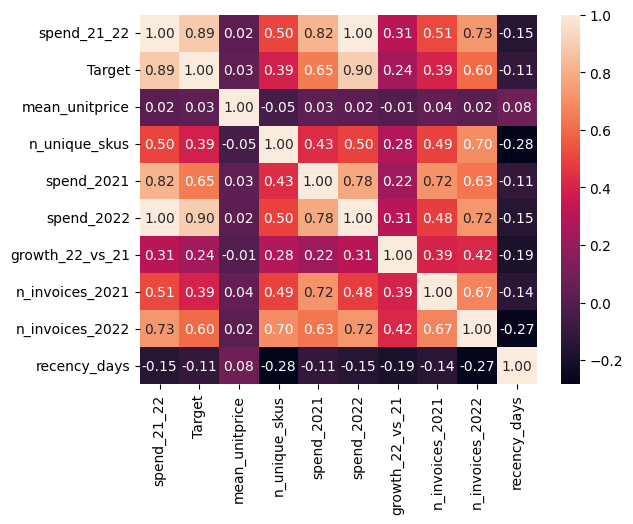

In [39]:
sns.heatmap(df_customer.corr(),annot=True,fmt="0.2f")